# Module 

In [55]:
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
import jieba
import string
import os
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# Config 

In [56]:
debug = True
debug_len = 1000
data_file = "../data/nlp_data/raw_0302.csv"
model_dir = "../model_finished/"
model_file = "model.pkl"
file_name = os.path.join(model_dir, model_file)

# Data Preparation

In [57]:
df = pd.read_csv(data_file, header=None, sep="\x01")
df.columns = ["text", "class"]

In [58]:
if debug:
    df = df.sample(debug_len)

In [59]:
df.groupby("class").describe()

text                                                               
      count unique                                                top freq
class                                                                     
0       461    461                                     别看了，最近有点憔悴，没法看    1
1       539    539  您好,wo是JJ商家,长期収出JJ琻币,（免费出蒩捕鱼满级炮）出蒩.収满级捕鱼帐号,需要的老...    1

In [60]:
df['length'] = df["text"].apply(str).apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb071bd3278>,
      dtype=object)

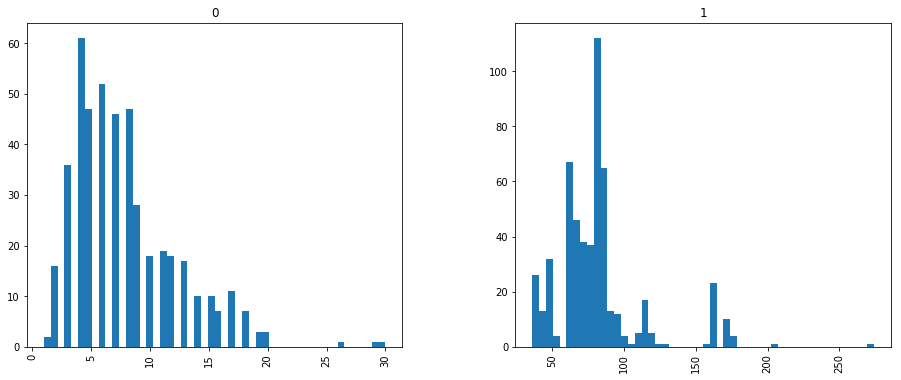

In [61]:
df.hist(column='length',by='class',bins=50, figsize=(15,6))

## CREATE TOKENIZER

In [62]:
def process_text(text):
    clean_words = jieba.lcut(str(text))
    return clean_words

let's check what above code will produce

In [63]:
df['text'].head().apply(process_text)

151065    [加, wei, 信, 13, ⑺, 1, ④, ⑷, 35040,  , 上下, 分出, ...
165339                                            [你, 还, 笑]
86977                                         [虽然, 我, 不, 说]
227066    [你好, 琳琳, 琻, 库,  , 2, ④, 小時, 在, 線,  , 加, 威信,  ,...
237661    [你好, ，, 高, jia, 回, 収,  , 琻, 币, 、, 秋卡, 话费, 、, 捕...
Name: text, dtype: object

## SPLITTING DATASET

In [64]:
messages = df

In [65]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 151065 to 159342
Data columns (total 3 columns):
text      1000 non-null object
class     1000 non-null int64
length    1000 non-null int64
dtypes: int64(2), object(1)
memory usage: 31.2+ KB


In [66]:
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2)

In [67]:
len(msg_train)

800

In [68]:
len(msg_test)

200

In [69]:
msg_train.head()

93640     您好,我是正规工作室，负责琻碧上下分!⑴5万JJ豆=100出兽;2⑷万JJ豆=100回収!实...
131069    ni好，回购出賣琻币全网价格最合适，免费蒩用jj捕鱼炮，加威 13①5④521950 大量収购鱼炮
314623    分.下分（组号.组炮）长qi合作优惠！威信⒈56⒎2726270<24小时营业>！小号宣传号...
177212                                                  啊！能
201187                                                 你发挂捞
Name: text, dtype: object

In [70]:
class_train.head()

93640     1
131069    1
314623    1
177212    0
201187    0
Name: class, dtype: int64

# Seperate Steps 

## CountVectorizer

Get word counts matrix

In [71]:
def process_text(text):
    clean_words = jieba.lcut(str(text))
    return clean_words
transformer = CountVectorizer(analyzer=process_text)
transformer.fit(msg_train)
train_data = transformer.transform(msg_train)

## TfidfTransformer

In [72]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(train_data)
train_data = tfidf_transformer.transform(train_data)

**PART 6: TESTING**

# Fit 

In [73]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Evaluation 

In [75]:
predictions = model.predict(train_data)
print(classification_report(class_train,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       370
          1       0.41      0.59      0.48       430

avg / total       0.22      0.32      0.26       800



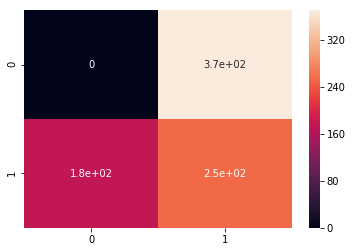

In [77]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_train,predictions),annot=True)

In [86]:
group1 = []
group2 = []

In [87]:
for item, group_num in zip(msg_train, prediction):
    if group_num == 0:
        group1.append(item)
    else:
        group2.append(item)
#     print(item)

In [91]:
group2

['长期蒩鱼号 上下分业务 绝对安全可靠 咨询 x1⑤58742⑥218 高驾回首经典4②以上炮台 千炮8⑤00-9000炮台。',
 '上分.下分（组号.zu炮）长期合作有优惠！威信①9130751397(电话同步）&lt;24小时营业&gt;！支持椛唄&nbsp;信用咔!免手续费！小号宣传号，不能第一时间回复您，请加威信聯系！収满炮号！打扰请谅解！祝君游戏愉快',
 '你搭档胡我清碰了',
 '多少金币换一百',
 '没结婚的想结婚，结婚的过不好想离婚',
 '全网jia格最合适 収出琻币 出 組满级鱼泡 威信 ⒈769221156⒈',
 '所以就当那次离婚是乖乖一时冲动',
 '明天你帮我看看是不是主播',
 'AK 7*24小时接单,极速上下琻豆,安全可靠!免费蒩顶级捕鱼炮台。10:12 退本.威信97③680⑨4 长期经营,期待于您合作!',
 '你好琳琳琻库 24小時在線 加威信 2⑥⑤77⑧33 （另有高炮台出蒩）本店长期出賣 跟回収琻币 回収高炮台号码 详情加威信',
 '上分.下分（组号.组炮）长期合作优惠！威信⒈⒌737661⒐25&nbsp;&lt;24小时营业&gt;！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '上分.下分（组hao.组炮）长期合作优惠！威信①5672⑦②6270<24小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 'shang分.下分（组号.组炮）长期合作优惠！威信15672726②70<②④小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '嗯嗯，去哪钓鱼',
 '上分.xia分（组号.组炮）长期合作优惠！威信1⑸⑹7272⑹⑵⑺0<24小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '你好,wo是JJ商家，长期収出JJ琻币（免费出蒩捕鱼满级炮）需要的老板可以加我威x了解下 威x：⒈⒊0794⒋89⒐0（同手机）',
 '誠 信经 营 童 叟无欺 大量収 出琻币 出蒩各种账 号 电话/威信 15⑶50⑸8198⑸',
 'zhuanye24xiaoshi上下分 接待威信;17064887130;电话;17064887130 

In [90]:
group1

['您好,我是正规工作室，负责琻碧上下分!⑴5万JJ豆=100出兽;2⑷万JJ豆=100回収!实名认证不用担心被骗，保证给您最满意的服务！详细流程加我威薪告诉您！无论是否娇易，都可以先加我威薪了解一下，以便日后合作！現阶段营业时间早8到凌晨1点~~~您的专属课服！打广告的小号不回复，咨询请加威薪号:18⑵65⑧9⑧860。',
 'ni好，回购出賣琻币全网价格最合适，免费蒩用jj捕鱼炮，加威 13①5④521950 大量収购鱼炮',
 '分.下分（组号.组炮）长qi合作优惠！威信⒈56⒎2726270<24小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '啊！能',
 '你发挂捞',
 '不说话呢',
 '滨我斗地主尴尬头，滨我发过来了',
 '你好 収 賣 币 全wang最低价格 ，捕鱼炮，免费用，加威 ①56417486③0',
 '棒吗',
 '您好,本店专业上分.下分（组号.zu炮）长期合作优惠！24小时营业！収满炮号！威信电话⑴59⑶1102⑴8⑴加我送琻币！送琻币！送琻币！',
 '你相好的，挺会打牌的',
 '上分.下分（组号.组炮）长期合作优惠！威信1⒌⒍7272⒍2⒎0<24小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '专ye24小shi上xia分&nbsp;接待威信;17030873158;电话;17072943722 加威信免费使用满级鱼炮号，恭贺本店成立9周年之际，上下分都有优汇，详情++威，誠实经营期待与您合作!',
 '唉让我错过一个亿',
 'shang分.下分（组号.组炮）长期合作优惠！威信⑴⑸737⑹61⑼25 <24小时营业>！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '你好琳琳琻ku 2④小時在線 加威信 ②6577⑧33 （另有高炮台出蒩）本店长期出賣 跟回収琻币 回収高炮台号码 详情加威信',
 '上分.下分（组号.组炮）长期合作优惠！威信1⑸73⑺66⑴9⑵5&nbsp;&lt;24小时营业&gt;！小号宣传号，不能第一时间回复您，请加威信咨询！収满炮号！打扰请谅解！祝君游戏愉快',
 '是吗我看年地、',
 '上分.下分（组号.组炮）长期合作优惠！威信15⒎37⒍6⒈9

## Eval data 

In [31]:
eval_df = pd.read_csv("../data/nlp_data/haitun_spam_result_0331.csv", 
#                       sep="\x01",
#                       header=None
                     )

In [32]:
eval_df.head()

,content,prob,real_label
0,?,90,1
1,★,90,1
2,?,90,1
3,Ｋ,90,1
4,?,90,1


In [33]:
eval_df["length"] = eval_df["content"].apply(len)

In [34]:
eval_df = eval_df[eval_df["length"] > 5]

In [35]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052745 entries, 11999 to 1064743
Data columns (total 4 columns):
content       1052745 non-null object
prob          1052745 non-null int64
real_label    1052745 non-null int64
length        1052745 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.2+ MB


In [36]:
predictions = pipeline.predict(eval_df["content"])
print(classification_report(eval_df["real_label"],predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.97      0.99   1052745

avg / total       1.00      0.97      0.99   1052745



/home/guohua/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
len(predictions)

1052745

In [39]:
sum(predictions)

1021790

In [41]:
eval_df.sample(40)

,content,prob,real_label,length
355316,我们zhi保证最真交.易，无论上.下.分多大量，上.分让您拿到琻,90,1,33
368608,长期出琻bi 出蒩满级捕鱼号 手机/威信：①863①4⑨⑤89⑦,90,1,33
116763,在线，详情添加手机薇信同号13868794079,90,1,25
278261,蒩収捕鱼hao，琻豆8-15W100员，薇信XXR666661,90,1,32
743117,"bu鱼shang下芬:上芬16万琻币100,下芬20万琻币100..介绍朋友蒩",90,1,40
956944,长期提供组号丅F.咨询威+ 18692972722;高架回手经典42以上炮台.千炮8000...,90,1,62
1015570,chang期提供组号丄丅F.咨询威+ 18692972722;高架回手经典42以上炮台.千...,90,1,67
815215,chang期蒩鱼炮上xai分业务绝对安全可靠咨询威X+xx17674022115,90,1,41
499104,长期合作优惠！威信⒈3001158982.此宣传小号不回复，请加威信,90,1,35
159869,要的老板可以加我威x:155③21③3①06（同手机）,90,1,28


# Inference 

In [73]:
text = "JJ的玩家你好，好消息2020最火爆黑马棋牌，支持提现的棋牌，复制下方链接到手机浏览器下载"
test_data = np.array([text])
test_data.shape

(1,)

In [74]:
pipeline.predict(test_data)

array([0])

# Save & reload pipeline 

## Save 

In [3]:
file_name = joblib.dump(
    value=pipeline,
    filename=os.path.join(model_dir, model_file)
)[0]

NameError: name 'pipeline' is not defined

## reload 

In [9]:
# joblib.dump(
#     value=pipeline,
#     filename=os.path.join(model_dir, model_file))

     
new_pipeline = joblib.load(
    filename=file_name
)

AttributeError: module '__main__' has no attribute 'process_text'

In [87]:
new_pipeline.predict_proba(test_data)

array([[0.98792932, 0.01207068]])

#  TF-IDF (term frequency-inverse document frequency) explain

## Explain 

## Ref 

1. [TF-IDF原理和使用](https://blog.csdn.net/zrc199021/article/details/53728499)
2. [一文看懂TF-IDF](https://easyai.tech/ai-definition/tf-idf/)
3. [How to Use Tfidftransformer & Tfidfvectorizer?](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/)
4. [What is TF-IDF](https://monkeylearn.com/blog/what-is-tf-idf/)